# Week 2 - Implementation of Shaffer et al

**Due January 25 at 8 PM**

In [1]:
# This line tells matplotlib to include plots here
% matplotlib inline
import numpy as np # We'll need numpy later
import scipy as sp
import matplotlib.pyplot as plt # This lets us access the pyplot functions
plt.style.use("ggplot")

## (1) Estimation of a sample mean from a normally distributed variable.

Let us assume that a true distribution of a process is described by the normal distribution with $\mu=5$ and $\sigma=1$. You have a measurement technique that allows you to sample n points from this distribution. In numpy this is a random number generator whose numbers will be chosen from the desired normal distribution by using the call `np.random.normal(loc=mu, scale=sigma, size=(n, ))`. Sample from this normal distribution from n=1 to 50 (I.e. n=1:50). Create a plot for the standard deviation of the calculated mean from each n when you repeat the sampling 1000 times each. (i.e. You will repeat your n observations 1000 times and will calculate the sample mean for each of the 1000 trials).

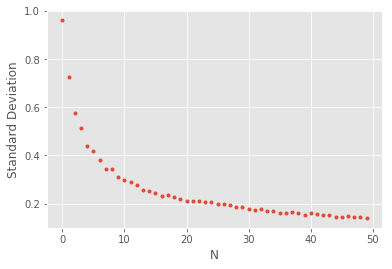

In [2]:
# Assign mean and standard deviation & initialize matrix 
mu = 5; sigma = 1
means = np.zeros((50,1000))
st_devs = np.zeros(50) 

# Fill matrix with sample means and standard deviations
for x in range (0,50):
    for y in range (0,1000):
        dist = np.random.normal(mu, sigma,(x+1))
        means[x,y] = np.mean(dist)
    st_devs[x] = np.std(means[x,1:1000])

# Plot standard deviation of mean for each n
plt.plot(st_devs,'.')
plt.ylabel('Standard Deviation')
plt.xlabel('N')
plt.show()

#### (1a) Plot the standard deviation of the estimate of the sample mean versus n. Add a second line which is $1/\sqrt{n}$. Describe what this tells you about the relationship between n and your power to estimate the underlying mean.

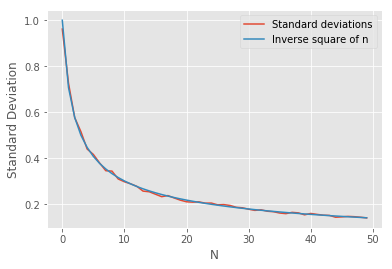

In [3]:
# Create array to plot values for 1/sqrt(n)
squares = np.zeros(50)

# Fill array with values for 1/sqrt(n)
for x in range (0,50):
    squares[x] = 1/((x+1)**0.5)
    
# Plot standard deviation of mean for each n and inverse square of each n
plt.plot(st_devs)
plt.plot(squares)
plt.legend(['Standard deviations', 'Inverse square of n'])
plt.ylabel('Standard Deviation')
plt.xlabel('N')
plt.show()

This graph indicates that there is a positive relationship between n and your ability to estimate the underlying mean. As the number of points in a distribution increases, the standard deviation for the distribution decreases. This decline in the standard deviation can make it significantly easier to determine the underlying mean when interpreting  the raw data.

#### (1b) Plot the boxplot for the sample means for all values n. Using words, interpret what the boxplot view of the 1000 trials for n=1 means and what the trends in the boxplot demonstrate compared to the plot in 1a (I.e. What information do you gain or lose in the two different plotting schemes)?

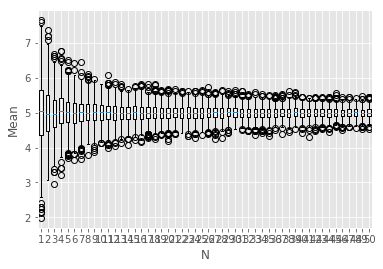

In [4]:
#Plot boxplot of mean for each n
plt.boxplot(np.ndarray.transpose(means))
plt.ylabel('Mean')
plt.xlabel('N')
plt.show()

The boxplot in 1b tells the user the median sample mean value, as well as the minimum and maximum mean values for each n. It also includes the interquartile range of the sample means for all n values. The graph plotted in 1a does not give us much information about each set of sample means, but instead simply indicates the standard deviation of the sample means for all n values. The trend of both graphs indicate that increasing the number of data points within the distribution (n) decreases the distribution's variance from the mean. While each of the graphs effectively allow us to draw the same conclusion, the boxplot does so more information.

#### (1c) For n=3, plot the histogram of the mean for the 1000 trials. Use the Kolmogorov-Smirnov test (`sp.stats.kstest`) to see if this sample distribution is normal (hint you will need to translate this to the standard normal distribution). Report the sample mean and sample standard deviation, the p-value from the test, and whether you would reject the null hypothesis.

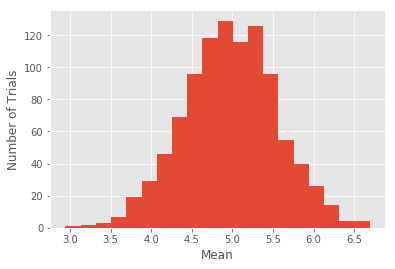

The sample mean when n = 3 is  4.97476188641 .
The sample standard deviation when n = 3 is  0.576452933187 .
The p-value from this test is 0.901686718848 .


In [5]:
# Import stats specifically
from scipy import stats

# Plot histogram for n=3
plt.hist(means[2,:], 20)
plt.ylabel('Number of Trials')
plt.xlabel('Mean')
plt.show()

# Use Z scoring to transform to normal  
x = stats.zscore(means[2,:])

# Run KS test for a normal distribution
ks = sp.stats.kstest(x, 'norm')

# Determine and report sample mean, sample standard deviation, and p-value
mean_n3 = np.mean(means[2,:])
std_n3 = np.std(means[2,:])
pval_n3 = (ks[1])
print('The sample mean when n = 3 is ',mean_n3,'.')
print('The sample standard deviation when n = 3 is ',std_n3,'.')
print('The p-value from this test is',pval_n3,'.')

The sample mean, standard deviation, and p-value are printed above and will vary sligtly each time the program is retested. The null hypothesis should be accepted as long as the p-value remains above the value for alpha, which is equal to 0.05 in this test. In other words, the KS test indicates the sample means for n = 3 do follow a normal distribution. 

#### (1d) Repeat 1c but for n=20. What changes when the number of samples increases?

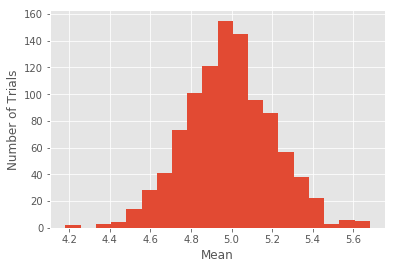

The sample mean when n = 20 is  4.98942462061 .
The sample standard deviation when n = 20 is  0.21793992793 .
The p-value from this test is 0.152642511606 .


In [6]:
# Import stats package
from scipy import stats

# Plot histogram for n=3
plt.hist(means[19,:], 20)
plt.ylabel('Number of Trials')
plt.xlabel('Mean')
plt.show()

# Use Z scoring to transform to normal  
x = stats.zscore(means[19,:])
ks = sp.stats.kstest(x, 'norm')

# Determine and report sample mean, sample standard deviation, and p-value
mean_n20 = np.mean(means[19,:])
std_n20 = np.std(means[19,:])
pval_n20 = (ks[1])
print('The sample mean when n = 20 is ',mean_n20,'.')
print('The sample standard deviation when n = 20 is ',std_n20,'.')
print('The p-value from this test is',pval_n20,'.')

When n increases from 3 to 20, the most signifanct change should be the sample standard deviation. In this case, it should decrease from approximately 0.5 to 0.2 (this can vary slightly due to the random nature of the number selection).

## (3) Differential expression

In this problem you will use the two-sample t-test to explore what differential hypothesis testing looks like in known standards.

- Distribution 1, normal with mu=1, sigma=1
- Distribution 2, normal with mu=3, sigma=1

In [7]:
# Assign mean and standard deviation for Distribution 1 and 2
mu1 = 1; mu2 = 3
 
# Define functions to create distributions with given conditions
def norm_distr(mu, sigma, n):
    return np.random.normal(mu, sigma, n)

#### (3a) False Negative: Using n=3, perform 100 comparisons of distribution 1 versus distribution 2 with an alpha=0.05. Anytime you fail to reject the hypothesis it is a false negative. Why is this a false negative? Report the number of false negatives from your 100 tests.

Hint: It'd be helpful to define a function that does this for you at this point.

In [8]:
# Set initial values, initialize array for false negative counter
sigma = 1
n = 3
alpha = 0.05
trials = 100
fals_neg = []

# Define function for t-test with input for sigma, n, alpha, and number of trials
def ttest_falsneg(sigma, n, alpha, trials):
    for x in range (0,trials):
        d1 = norm_distr(mu1, sigma, n)
        d2 = norm_distr(mu2, sigma, n)
        t_test = stats.ttest_ind(d1, d2)
        pvalue = t_test[1]
        if pvalue > alpha:
            fals_neg.append(1)
            
# Run function for 100 trials
ttest_falsneg(sigma, n, alpha, trials)        
print('Number of false negatives is',sum(fals_neg),'.')  

Number of false negatives is 57 .


The case described would be a false negative result, as a false negative occurs when you have two distributions that are different in reality, but your t-test indicates that they are not significantly different. 

#### (3b) False Positives: Using n=3, perform 100 comparisons of distribution 1 versus distribution 1 with an alpha=0.05. Anytime you reject the hypothesis this is a false positive. Why is this a false positive? Report the number of false positives from your 100 tests.

In [9]:
# Set initial values, initialize array for false positive counter
sigma = 1
n = 3
alpha = 0.05
trials = 100
fals_pos = []

# Define function for t-test with input for sigma, n, alpha, and number of trials
def ttest_falspos(sigma, n, alpha, trials):
    for x in range (0,trials):
        d1a = norm_distr(mu1, sigma, n)
        d1b = norm_distr(mu1, sigma, n)
        t_test = stats.ttest_ind(d1a, d1b)
        pvalue = t_test[1]
        if pvalue < alpha:
            fals_pos.append(1)
            
# Run function for 100 trials
ttest_falspos(sigma, n, alpha, trials)        
print('Number of false positives is',sum(fals_pos),'.')  

Number of false positives is 5 .


The case described would be a false positive result, as a false positive occurs when you have two distributions that are equivalent in reality, but your t-test indicates that they are significantly different.

#### (3c) Repeat 3b but 1000 times. What is the number of false positives? Predict the number of false positives you would get if you compared samples from the same distribution 10,000 times and explain why.

In [10]:
# Set initial values, initialize array for false positive counter
sigma = 1
n = 3
alpha = 0.05
trials = 1000
fals_pos = []

# Run function for 1000 trials
ttest_falspos(sigma, n, alpha, trials)        
print('Number of false positives is',sum(fals_pos),'.')  

Number of false positives is 57 .


If you compared samples from the same distribution 10,000 times, you would get approximately 500 false positives. This is so because the number of false positives for this distribution should be around 5%, which is determined by the alpha value of 0.05 in the t-test. The results from 3a and 3b correspond with this prediction. 

#### (3d) Now sweep n from 3 to 30 and report the number of false positives and false negatives for each n when you run 100 comparisons. (Provide this in a table format). Please explain the trend you see and interpret its meaning.

In [11]:
# Set initial values, initialize matrix for total error counter
sigma = 1
alpha = 0.05
trials = 100
fals_pos = []
errors = np.zeros([28,3])

# Sweep n from 3-30
for i in range (0,28):
    errors[i,0] = i+3
    
    fals_pos = []
    ttest_falspos(sigma,(i+3), alpha, trials)
    errors[i,1] = sum(fals_pos)
    
    fals_neg = []
    ttest_falsneg(sigma,(i+3), alpha, trials)
    errors[i,2] = sum(fals_neg)

# Print table
import pandas as pd
header = ('N', 'False Positives', 'False Negatives')
table = pd.DataFrame(errors, columns = header)
print(table)

       N  False Positives  False Negatives
0    3.0              4.0             46.0
1    4.0              8.0             27.0
2    5.0              4.0             21.0
3    6.0              5.0             15.0
4    7.0              3.0              9.0
5    8.0              4.0              9.0
6    9.0              4.0              3.0
7   10.0              2.0              2.0
8   11.0              8.0              0.0
9   12.0              3.0              0.0
10  13.0              4.0              0.0
11  14.0              3.0              0.0
12  15.0              5.0              0.0
13  16.0              6.0              0.0
14  17.0              8.0              0.0
15  18.0              4.0              0.0
16  19.0              6.0              0.0
17  20.0              5.0              0.0
18  21.0              4.0              0.0
19  22.0              2.0              0.0
20  23.0              4.0              0.0
21  24.0              4.0              0.0
22  25.0   

The number of false positives from 100 tests does not change with sampling size. Because our alpha is set to 0.05, it is appropriate for roughly 5% of tests to give false positive results. This error is inherent when running a t-test with an alpha of this value. On the other hand, the number of false negatives quickly decreases to 0 as the sample size increases. When the sample size of two different distributions is small, it is more likely that the random  points selected appear to be more similar to one another than the distributions truly are. 

#### (3e) For n=3, suggest how the number of false negatives changes according to sigma for the two distributions and test this. Report your new values and sigma and the number of false negatives in 100 tests.

In [12]:
# Set initial values, initialize matrix for false negative counter
n = 3
alpha = 0.05
trials = 100
errors = np.zeros([20,2])
       
# Sweep sigma from 1-20
for i in range (0,20):
    errors[i,0] = i+1
    
    fals_neg = []
    ttest_falsneg((i+1), n, alpha, trials)
    errors[i,1] = sum(fals_neg)

# Print table
import pandas as pd
header = ('Sigma', 'False Negatives')
table = pd.DataFrame(errors, columns = header)
print(table)

    Sigma  False Negatives
0     1.0             46.0
1     2.0             79.0
2     3.0             93.0
3     4.0             92.0
4     5.0             88.0
5     6.0             97.0
6     7.0             92.0
7     8.0             96.0
8     9.0             97.0
9    10.0             96.0
10   11.0             96.0
11   12.0             96.0
12   13.0             95.0
13   14.0             97.0
14   15.0             97.0
15   16.0             91.0
16   17.0             99.0
17   18.0             96.0
18   19.0             98.0
19   20.0             94.0


#### (3f) Lastly, perform 3d for p < 0.01 instead of p < 0.05. How does this influence the rate of false positives and negatives? How might you use this when performing many tests?

In [13]:
# Set initial values, initialize matrix for total error counter
sigma = 1
alpha = 0.01
trials = 100
fals_pos = []
errors = np.zeros([28,3])

# Sweep n from 3-30
for i in range (0,28):
    errors[i,0] = i+3
    
    fals_pos = []
    ttest_falspos(sigma,(i+3), alpha, trials)
    errors[i,1] = sum(fals_pos)
    
    fals_neg = []
    ttest_falsneg(sigma,(i+3), alpha, trials)
    errors[i,2] = sum(fals_neg)

# Print table
import pandas as pd
header = ('N', 'False Positives', 'False Negatives')
table = pd.DataFrame(errors, columns = header)
print(table)

       N  False Positives  False Negatives
0    3.0              2.0             84.0
1    4.0              0.0             71.0
2    5.0              2.0             54.0
3    6.0              2.0             33.0
4    7.0              4.0             27.0
5    8.0              0.0             15.0
6    9.0              0.0             11.0
7   10.0              0.0              3.0
8   11.0              1.0              1.0
9   12.0              1.0              1.0
10  13.0              1.0              0.0
11  14.0              1.0              2.0
12  15.0              4.0              0.0
13  16.0              0.0              1.0
14  17.0              1.0              0.0
15  18.0              1.0              0.0
16  19.0              1.0              0.0
17  20.0              2.0              0.0
18  21.0              1.0              0.0
19  22.0              0.0              0.0
20  23.0              1.0              0.0
21  24.0              1.0              0.0
22  25.0   

Lowering the value for alpha from 0.05 to 0.01 significantly lowers the number if false positives we see across all sample sizes. This change in alpha increases the number of false negatives in tests with smaller sample sizes. However, like with an alpha value of 0.05, the number of false negatives eventually reaches 0 with larger sample sizes. For these reasons, it would be appropriate to test with a lower alpha value for larger N values, as it would result in fewer false positive without affecting the false negatives. 

## (4) Shaffer et al implementation

In this excercise we're going to apply some basic concepts of statistics to a classic of molecular biology—the [Luria-Delbrück experiment](https://en.wikipedia.org/wiki/Luria–Delbrück_experiment).

This data doesn't come from the original experiment, but rather a recent study that [applied a similar approach to study cancer cell resistance](https://www.nature.com/nature/journal/v546/n7658/abs/nature22794.html).

In [14]:
repOne = np.loadtxt("expt_rep1.csv")
repTwo = np.loadtxt("expt_rep2.csv")

#### (4a) First, we need to build up a distribution of outcomes for what an experiment would look like if it followed the Luria-Delbruck process.
Fill in the function below keeping track of normal and mutant cells. Then, make a second function, `CVofNRuns`, that runs the experiment 3000 times. You can assume a culture size of 120000 cells, and mutation rate of 0.0001 per cell per generation. What does the distribution of outcomes look like?

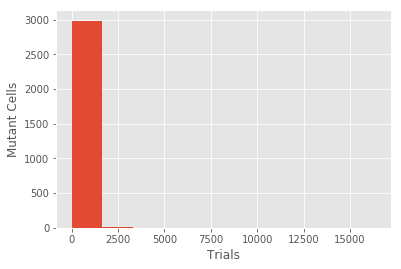

In [15]:
cultureSize = 120000
mutationRate = 0.0001
trials = 3000

# Runs the simulation a bunch of times, and looks for how often the fano (cv/mean) comes out to one side

def simLuriaDelbruck(cultureSize, mutationRate):
    nCells, nMuts = 1, 0  # Start with 1 non-resistant cell

    for i in range(np.int(np.floor(np.log2(cultureSize)))):  # num of gens
        nCells = 2*nCells  # Double the number of cells, simulating division
        newMuts = np.random.poisson(nCells * mutationRate)  # de novo
        nMuts = 2*nMuts + newMuts  # Previous mutants divide and add
        nCells = nCells - newMuts  # Non-resistant pop goes down by newMuts

    return nMuts

def CVofNRuns(trials):
    cellCount = np.zeros(trials)
    for i in range (0,trials):
        cellCount[i] = simLuriaDelbruck(cultureSize, mutationRate)
    return cellCount 

cellCount = CVofNRuns(trials)
plt.hist(cellCount)
plt.xlabel('Trials')
plt.ylabel('Mutant Cells')
plt.show()

#### (4b) Compare the distribution of outcomes between the two replicates of the experiment using the 2-sample KS test (`sp.stats.ks_2samp`). Are they consistent with one another?
Hint: Each experiment varies slightly in the amount of time it was run. The absolute values of the numbers doesn't matter, so much as the variation of them. You'll need to correct for this by dividing by the mean of the results.

In [16]:
# Correct repOne and repTwo by dividing by their respective means
repOne_corr = repOne/np.mean(repOne)
repTwo_corr = repTwo/np.mean(repTwo)

# Run 2-sample KS test
ks_2samp = sp.stats.ks_2samp(repOne_corr, repTwo_corr)
print('The p-value of this KS test is', ks_2samp[1],'.')

The p-value of this KS test is 0.192751559116 .


The distributions appear to be consistent with one another. The p-value for this KS test is greater than 0.05, thus the test tells us that the distributions are not significantly different. 

#### (4c) Compare the distribution of outcomes between the experiment and model. Are our results consistent with resistance arising through a Luria-Delbruck related process?

In [17]:
# Correct cellCount by dividing by its mean
cellCount_corr = cellCount/np.mean(cellCount)

# Run 2-sample KS test
ks_2samp = sp.stats.ks_2samp(repOne_corr, cellCount_corr)
print('The p-value of the KS test between the model and the first experiment is', ks_2samp[1],'.')

ks_2samp2 = sp.stats.ks_2samp(repTwo_corr, cellCount_corr)
print('The p-value of the KS test between the model and the second experiment is', ks_2samp2[1],'.')

The p-value of the KS test between the model and the first experiment is 1.24495576103e-15 .
The p-value of the KS test between the model and the second experiment is 2.629099338e-07 .


The KS test indicates that our model distribution is significantly different from both experimental distributions. Thus, the model is not consistent with the experimental behavior of cells arising through a Luria-Delbruck related process.

#### (4d) We assumed a specific mutation rate and final number of cells. How might you show whether or not these parameters influence our results?

We could first set up a nested for loop that inputs a range of values for both cultureSize and mutationRate. Within this loop, we would want to run 2-sample KS tests between the adjusted model and the experimental data. By saving and comparing the p-values from the KS-tests for each of our different inputs for cultureSize and mutationRate, we could determine if and how the paramters influence our results. 